In [1]:
import pandas as pd
import numpy as np

In [2]:
# import landscape
# https://drive.google.com/file/d/1sKOtfZKz5niVHuTNnee0oC7BGWVLh_GX/view?usp=drive_link
!gdown --id 1sKOtfZKz5niVHuTNnee0oC7BGWVLh_GX
Landscape = pd.read_csv('Landscape_Data.csv')

# import decision stack
# https://drive.google.com/file/d/1zO5bCzBGVvVIh9LjnTR_q7B8jW8GLQNL/view?usp=drive_link
!gdown --id 1zO5bCzBGVvVIh9LjnTR_q7B8jW8GLQNL
decision = pd.read_csv('Decision Stack.csv')

# import Application_Scope
# https://docs.google.com/spreadsheets/d/1GwoBRpN6ZqZPIEGI-D2pRJ-YgeFh42qw/edit?usp=drive_link&ouid=105987614092058378285&rtpof=true&sd=true
!gdown --id 1GwoBRpN6ZqZPIEGI-D2pRJ-YgeFh42qw
application = pd.read_excel('Application_Scope_Data.xlsx')

# import Demonstrated Interest
# https://drive.google.com/file/d/1fdHbXmqVzP1eIl1fdDPDML06-BVCQyhr/view?usp=drive_link
!gdown --id 1fdHbXmqVzP1eIl1fdDPDML06-BVCQyhr
demonstrate = pd.read_csv('Demonstrated Interest.csv')

# import Enrollment Status
# https://drive.google.com/file/d/1t09SAvhclqBM832B22L2Ci4qPmZotqSr/view?usp=drive_link
!gdown --id 1t09SAvhclqBM832B22L2Ci4qPmZotqSr
enrollment = pd.read_csv('Enrollment Status.csv')

# import MarketView
# https://docs.google.com/spreadsheets/d/1E7_mYS4fvstAQJvAdYYLQL_kaIC_lqxJ/edit?usp=drive_link&ouid=105987614092058378285&rtpof=true&sd=true
!gdown --id 1E7_mYS4fvstAQJvAdYYLQL_kaIC_lqxJ
market = pd.read_excel('MarketView.xlsx')

# import People_Scope
# https://docs.google.com/spreadsheets/d/1mbH20gCek2GJP4Q13Fw6RPEuS_O8X-BR/edit?usp=drive_link&ouid=105987614092058378285&rtpof=true&sd=true
!gdown --id 1mbH20gCek2GJP4Q13Fw6RPEuS_O8X-BR
people = pd.read_excel('People_Scope_Data.xlsx')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1sKOtfZKz5niVHuTNnee0oC7BGWVLh_GX
To: /content/Landscape_Data.csv
100% 33.3M/33.3M [00:00<00:00, 124MB/s]


<ipython-input-2-03889bb6c04a>:4: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  Landscape = pd.read_csv('Landscape_Data.csv')


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zO5bCzBGVvVIh9LjnTR_q7B8jW8GLQNL
To: /content/Decision Stack.csv
100% 22.8M/22.8M [00:00<00:00, 87.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GwoBRpN6ZqZPIEGI-D2pRJ-YgeFh42qw
To: /content/Application_Scope_Data.xlsx
100% 20.7M/20.7M [00:00<00:00, 64.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloadin

In [3]:
# then I merge all the data together on PUBLIC_ID

In [4]:
market = market.rename(columns={'PublicID': 'PUBLIC_ID'})

In [5]:
#df = pd.merge(landscape_out_state, decision, on='PUBLIC_ID', how='left')
df = pd.merge(Landscape, decision, on='PUBLIC_ID', how='left')
df = pd.merge(df, application, on='PUBLIC_ID', how='left')
df = pd.merge(df, demonstrate, on='PUBLIC_ID', how='left')
df = pd.merge(df, enrollment, on='PUBLIC_ID', how='left')
df = pd.merge(df, market, on='PUBLIC_ID', how='left')
df = pd.merge(df, people, on='PUBLIC_ID', how='left')

In [6]:
# select the students that are out-of-state
df = df[df['APPLICATION_RESIDENCY'] == 'Out-of-State']

In [7]:
df['Enrollment Term/Year'].value_counts()

Enrollment Term/Year
1238.0    26699
1228.0    23400
1218.0    23387
1208.0      126
1223.0       50
1213.0       12
0.0           2
Name: count, dtype: int64

In [8]:
# select the columns that is meaningful
df = df[['PUBLIC_ID', 'PERSON_CAMPUS', 'PERSON_LANDSCAPE_NEIGHBORHOOD_CONTEXT', 'PERSON_LANDSCAPE_SCHOOL_CONTEXT', 'PERSON_STARS_ACADEMIC_GPA_WEIGHTED_RECALCULATED', 'PERSON_STARS_OVERALL_WEIGHTED_GPA_RECALCULATED',
    'geo', 'entry_term', 'display_score', 'sat_ebrw', 'act_composite', 'sat_math', 'score_source', 'hs_ceeb_cd', 'org_nm', 'a_sr_class_size', 'a_hs_college_access', 'a_hs_medfaminc_ptile', 'st_a_nh_medfaminc_ptile', 'first_generation',
    'APPLICATION_ALTERNATE_CHOICE_MAJOR', 'APPLICATION_ALTERNATE_CHOICE_PROGRAM', 'APPLICATION_FIRST_CHOICE_CAMPUS', 'APPLICATION_ASSIGNED_MAJOR', 'APPLICATION_ASSIGNED_PROGRAM',
    'APPLICATION_ASSESSMENT', 'APPLICATION_RECALCULATED_GPA_DOMESTIC', 'Enrollment Term/Year', 'Rank 1 Released Code', 'Rank 2 Released Code', 'Rank 3 Released Code', 'Rank 4 Released Code',
    'Rank 5 Released Code', 'UC_APPLS_ENROLLED_10TH_DAY', 'UC_APPLS_ENROLLED_10TH_DAY_TERM', 'UC_APPLS_ADMIT_TERM', 'MARKETview App Deposit Bracket', 'MARKETview Consumer Rating', 'MARKETview Consumer Income']]

In [9]:
# get the address of each applicant by their geo id

In [10]:
# https://drive.google.com/file/d/1c97AbhuJJgfD-TV9KJkqO2VFVV-Pq0uQ/view?usp=drive_link
!gdown --id 1c97AbhuJJgfD-TV9KJkqO2VFVV-Pq0uQ
dic = pd.read_csv('fips.txt', delimiter='\t')

df = df[df['geo'].notnull()]
df['geo'] = df['geo'].astype(int)
df['geo'] = df['geo'].astype(str)
df['geo11'] = df['geo'].apply(lambda x: '0' + x if len(x) == 10 else x)
df['geo5'] = df['geo11'].str[:5]
dic[['geo5', 'loc']] = dic['    FIPS code     name'].str.split(n=1, expand=True)
dic = dic[['geo5', 'loc']]
df = df.drop(columns=['geo', 'geo11'])
df_g = pd.merge(df, dic, on='geo5', how='left')
df_g['geo2'] = df_g['geo5'].str[:2]
dic2 = dic
dic2 = dic2.rename(columns={'geo5': 'geo2'})
df_g = pd.merge(df_g, dic2, on='geo2', how='left')
df_g['address'] = df_g.apply(lambda row: f"{row['loc_x']}, {row['loc_y']}", axis=1)
df_23_notnull = df_g[df_g['loc_x'].notnull()]
df_23_notnull = df_23_notnull.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1c97AbhuJJgfD-TV9KJkqO2VFVV-Pq0uQ
To: /content/fips.txt
100% 104k/104k [00:00<00:00, 84.8MB/s]


<ipython-input-10-1b6d52a426ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geo'] = df['geo'].astype(int)
<ipython-input-10-1b6d52a426ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geo'] = df['geo'].astype(str)
<ipython-input-10-1b6d52a426ab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [11]:
df = df_23_notnull.drop(columns= ['geo5', 'loc_x', 'geo2', 'loc_y', 'address'])

In [12]:
# get latitude and longitude

In [13]:
# https://drive.google.com/file/d/1Z-r3UBZppD2N5FUIzRcLPwmTo8mMNwfK/view?usp=drive_link
!gdown --id 1Z-r3UBZppD2N5FUIzRcLPwmTo8mMNwfK
lat_long = pd.read_csv('lat_long.csv')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Z-r3UBZppD2N5FUIzRcLPwmTo8mMNwfK
To: /content/lat_long.csv
100% 1.58M/1.58M [00:00<00:00, 94.3MB/s]


In [14]:
df = pd.concat([df.reset_index(drop=True), lat_long.reset_index(drop=True)], axis=1)

In [15]:
# function: whether the applicant is admitted
def check_admit(row):
    return 1 if row['Rank 1 Released Code'] == 'AT' or row['Rank 2 Released Code'] == 'AT' or row['Rank 3 Released Code'] == 'AT' or row['Rank 4 Released Code'] == 'AT' or row['Rank 5 Released Code'] == 'AT' else 0

# function: whether the applicant has enrolled
def check_enroll(row):
    return 1 if row['Rank 1 Released Code'] == 'DEIN' or row['Rank 2 Released Code'] == 'DEIN' or row['Rank 3 Released Code'] == 'DEIN' or row['Rank 4 Released Code'] == 'DEIN' or row['Rank 5 Released Code'] == 'DEIN' else 0

# function: whether the applicant is Withdrawal - Administrative
def check_WADM(row):
    return 1 if row['Rank 1 Released Code'] == 'WADM' or row['Rank 2 Released Code'] == 'WADM' or row['Rank 3 Released Code'] == 'WADM' or row['Rank 4 Released Code'] == 'WADM' or row['Rank 5 Released Code'] == 'WADM' else 0

# function: whether the applicant is Withdrawal - Declined Decision
def check_WAPPDD(row):
    return 1 if row['Rank 1 Released Code'] == 'WAPPDD' or row['Rank 2 Released Code'] == 'WAPPDD' or row['Rank 3 Released Code'] == 'WAPPDD' or row['Rank 4 Released Code'] == 'WAPPDD' or row['Rank 5 Released Code'] == 'WAPPDD' else 0

# function: whether the applicant is Withdrawal - Applicant
def check_WAPP(row):
    return 1 if row['Rank 1 Released Code'] == 'WAPP' or row['Rank 2 Released Code'] == 'WAPP' or row['Rank 3 Released Code'] == 'WAPP' or row['Rank 4 Released Code'] == 'WAPP' or row['Rank 5 Released Code'] == 'WAPP' else 0

In [16]:
# label whether the applicant has been admitted
df['AT'] = df.apply(check_admit, axis=1)

# label whether the applicant has enrolled
df['DEIN'] = df.apply(check_enroll, axis=1)

# label whether the applicant is Withdrawal - Administrative
df['WADM'] = df.apply(check_WADM, axis=1)

# label whether the applicant is Withdrawal - Declined Decision
df['WAPPDD'] = df.apply(check_WAPPDD, axis=1)

# label whether the applicant is Withdrawal - Applicant
df['WAPP'] = df.apply(check_WAPP, axis=1)

# if the applicant is Withdrawal, it means they cancelled or are cancelled their enrollment, so they did not enroll
def check_DEIN_1(row):
  return 0 if row['WADM'] == 1 or row['WAPPDD'] == 1 or row['WAPP'] == 1 else row['DEIN']

df['DEIN'] = df.apply(check_DEIN_1, axis=1)

# if the applicant actually came to UConn by 10th day, the applicant also enrolled
def check_DEIN_2(row):
  return 1 if row['UC_APPLS_ENROLLED_10TH_DAY'] == 1 else row['DEIN']
  return 0 if row['UC_APPLS_ENROLLED_10TH_DAY'] == 0 else row['DEIN']

df['DEIN'] = df.apply(check_DEIN_2, axis=1)

In [17]:
# drop the decision stack columns and Withdrawal columns
df = df.drop(columns=['Rank 1 Released Code', 'Rank 2 Released Code', 'Rank 3 Released Code', 'Rank 4 Released Code', 'Rank 5 Released Code', 'WADM', 'WAPPDD', 'WAPP'])

In [18]:
# drop marketview columns, too much missing values
df = df.drop(columns=['MARKETview App Deposit Bracket', 'MARKETview Consumer Rating', 'MARKETview Consumer Income'])

In [19]:
# calculate distance

In [20]:
df = df[df['APPLICATION_FIRST_CHOICE_CAMPUS'].notnull()]

In [21]:
df['APPLICATION_FIRST_CHOICE_CAMPUS'].value_counts()

APPLICATION_FIRST_CHOICE_CAMPUS
Storrs         66639
Stamford        1445
Hartford         117
Avery Point       62
Waterbury         49
Name: count, dtype: int64

In [22]:
# storrs: lat 41.8132138 long -72.2495774
# Stamford: lat 41.051917 long -73.5432191
# Hartford: lat 43.6057195 long -72.3014921
# Avery Point: lat 41.3153286 long -72.0647228
# Waterbury: 41.55591495 long -73.039008

df['lat_choice'] = 0
df['long_choice'] = 0
def locate_choice(row):
    if row['APPLICATION_FIRST_CHOICE_CAMPUS'] == 'Storrs':
        row['lat_choice'] = 41.8132138
        row['long_choice'] = -72.2495774
    elif row['APPLICATION_FIRST_CHOICE_CAMPUS'] == 'Stamford':
        row['lat_choice'] = 41.051917
        row['long_choice'] = -73.5432191
    elif row['APPLICATION_FIRST_CHOICE_CAMPUS'] == 'Hartford':
        row['lat_choice'] = 43.6057195
        row['long_choice'] = -72.3014921
    elif row['APPLICATION_FIRST_CHOICE_CAMPUS'] == 'Avery Point':
        row['lat_choice'] = 41.3153286
        row['long_choice'] = -72.0647228
    elif row['APPLICATION_FIRST_CHOICE_CAMPUS'] == 'Waterbury':
        row['lat_choice'] = 41.55591495
        row['long_choice'] = -73.039008
    return row

df = df.apply(locate_choice, axis=1)

import math
# define a function to calculate distance
def haversine(lon1, lat1, lon2, lat2):
  lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
  c = 2 * math.asin(math.sqrt(a))
  r = 6371.0
  return c * r

# distance in km
df['distance'] = df.apply(lambda row: haversine(row['lon'], row['lat'], row['long_choice'], row['lat_choice']), axis=1)

<ipython-input-22-db1bbe118eff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_choice'] = 0
<ipython-input-22-db1bbe118eff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['long_choice'] = 0


In [23]:
# so we can just focus on term 1238, 1228, 1218. Other terms have too few values.

In [24]:
data_21 = df[df['Enrollment Term/Year'] == 1218] # extract the 1218 term data as data_21

In [25]:
data_21 = data_21[['PUBLIC_ID','APPLICATION_ASSESSMENT', 'hs_ceeb_cd', 'org_nm', 'a_hs_medfaminc_ptile', 'AT', 'DEIN', 'distance', 'a_hs_college_access']]

In [26]:
data_21

,PUBLIC_ID,APPLICATION_ASSESSMENT,hs_ceeb_cd,org_nm,a_hs_medfaminc_ptile,AT,DEIN,distance,a_hs_college_access
0,FE6F891B5B5FF2D5F9CD9AA5BFBE0C7B,5.0,335420,THE STONY BROOK SCHOOL,4.0,1,1,115.199976,6.0
1,FE6F891B5B5FF2D5F9CD9AA5BFBE0C7B,5.0,335420,THE STONY BROOK SCHOOL,4.0,1,1,115.199976,6.0
2,ACD6A3657F1C6F63678EB88A8C5642E5,8.0,70840,JOHN F KENNEDY HIGH SCHOOL,82.0,1,0,27.364668,78.0
17,E2B00AC8F7498A140DFB5D3541C3A195,4.0,300115,CONCORD HIGH SCHOOL,20.0,1,1,174.444563,22.0
18,E2B00AC8F7498A140DFB5D3541C3A195,4.0,300115,CONCORD HIGH SCHOOL,20.0,1,1,174.444563,22.0
...,...,...,...,...,...,...,...,...,...
20306,4631F7CB1475606621D6C6D2E9D5A1B1,1.0,210008.0,ANNAPOLIS HIGH SCHOOL,10.0,1,0,483.495614,48.0
20307,4A12185DA734E5AB9F55B5AB53E863D2,6.0,330357.0,BENJAMIN CARDOZO HIGH SCHOOL,31.0,1,0,179.897472,13.0
20308,B1FD5B798BFBD8CA1DCAC41895247A5F,3.0,221725.0,PEABODY VETERANS MEMORIAL HIGH SCHOOL,24.0,1,0,143.792726,9.0
20309,003CBE296D33EB1715A0F39038A308CD,4.0,221403.0,OLD ROCHESTER REGIONAL HIGH SCHOOL,14.0,1,0,124.008167,4.0


In [27]:
# calculate the average distance of applicant of each high school to their target campus
result_dis_21 = data_21.groupby('hs_ceeb_cd')['distance'].mean()
df_dis_21 = result_dis_21.reset_index()
df_dis_21

,hs_ceeb_cd,distance
0,2198.0,125.008589
1,3390,95.965389
2,5828.0,1895.841904
3,10355,1582.664437
4,10415.0,1582.664437
...,...,...
6233,F33194,44.614010
6234,F61310,102.612962
6235,F67161,192.489043
6236,F70003,11.042442


In [28]:
# calculate the median APPLICATION_ASSESSMENT of the students of in each high school
result_APPLICATION_ASSESSMENT = data_21.groupby('hs_ceeb_cd')['APPLICATION_ASSESSMENT'].median()
df_APPLICATION_ASSESSMENT = result_APPLICATION_ASSESSMENT.reset_index()
df_APPLICATION_ASSESSMENT

,hs_ceeb_cd,APPLICATION_ASSESSMENT
0,2198.0,4.0
1,3390,NaN
2,5828.0,5.0
3,10355,5.0
4,10415.0,4.0
...,...,...
6233,F33194,5.0
6234,F61310,4.0
6235,F67161,7.0
6236,F70003,4.0


In [29]:
# calculate the admitted rate to UCONN of the students of in each high school
result_AT = data_21.groupby('hs_ceeb_cd')['AT'].mean()
df_AT = result_AT.reset_index()
df_AT

,hs_ceeb_cd,AT
0,2198.0,1.0
1,3390,1.0
2,5828.0,1.0
3,10355,1.0
4,10415.0,1.0
...,...,...
6233,F33194,1.0
6234,F61310,1.0
6235,F67161,1.0
6236,F70003,1.0


In [30]:
# calculate the enrollment rate to UCONN of the students of in each high school
result_DEIN = data_21.groupby('hs_ceeb_cd')['DEIN'].mean()
df_DEIN = result_DEIN.reset_index()
df_DEIN

,hs_ceeb_cd,DEIN
0,2198.0,1.0
1,3390,0.0
2,5828.0,0.0
3,10355,0.0
4,10415.0,0.0
...,...,...
6233,F33194,0.0
6234,F61310,0.0
6235,F67161,1.0
6236,F70003,1.0


In [31]:
# calculate the admit/enrollment rate to UCONN of the students of in each high school
result_ATs_21 = data_21.groupby('hs_ceeb_cd')['AT'].sum()
df_ATs_21 = result_ATs_21.reset_index()

result_DEINs_21 = data_21.groupby('hs_ceeb_cd')['DEIN'].sum()
df_DEINs_21 = result_DEINs_21.reset_index()

df_21_at_er = pd.merge(df_ATs_21, df_DEINs_21, on='hs_ceeb_cd', how='left')

# define a function to calculate the admit/enrollment rate
def compute_rate(row):
    if row['AT'] == 0:
        return 'no record'
    else:
        return round(row['DEIN'] / row['AT'], 2)

df_21_at_er['yield rate'] = df_21_at_er.apply(compute_rate, axis=1)

In [32]:
df_21 = pd.merge(df_APPLICATION_ASSESSMENT, df_AT, on='hs_ceeb_cd', how='left')
df_21 = pd.merge(df_21, df_DEIN, on='hs_ceeb_cd', how='left')
df_21 = pd.merge(df_21, df_21_at_er[['hs_ceeb_cd', 'yield rate']], on='hs_ceeb_cd', how='left')
df_21 = pd.merge(df_21, df_dis_21, on='hs_ceeb_cd', how='left')
df_21 = pd.merge(df_21, data_21[['hs_ceeb_cd', 'org_nm', 'a_hs_medfaminc_ptile', 'a_hs_college_access']].drop_duplicates(subset=['hs_ceeb_cd']), on='hs_ceeb_cd', how='left')

In [33]:
# so df_21 is the dataframe that each row gives the information of one high school
df_21

,hs_ceeb_cd,APPLICATION_ASSESSMENT,AT,DEIN,yield rate,distance,org_nm,a_hs_medfaminc_ptile,a_hs_college_access
0,2198.0,4.0,1.0,1.0,1.0,125.008589,NaN,NaN,NaN
1,3390,NaN,1.0,0.0,0.0,95.965389,NaN,NaN,NaN
2,5828.0,5.0,1.0,0.0,0.0,1895.841904,NaN,NaN,NaN
3,10355,5.0,1.0,0.0,0.0,1582.664437,RAMSAY HIGH SCHOOL,82.0,84.0
4,10415.0,4.0,1.0,0.0,0.0,1582.664437,SHADES VALLEY HIGH SCHOOL,36.0,34.0
...,...,...,...,...,...,...,...,...,...
6233,F33194,5.0,1.0,0.0,0.0,44.614010,NaN,NaN,NaN
6234,F61310,4.0,1.0,0.0,0.0,102.612962,NaN,NaN,NaN
6235,F67161,7.0,1.0,1.0,1.0,192.489043,NaN,NaN,NaN
6236,F70003,4.0,1.0,1.0,1.0,11.042442,NaN,NaN,NaN


In [34]:
# We can do the same thing to term 1228 and 1238

In [35]:
data_22 = df[df['Enrollment Term/Year'] == 1228] # extract the 1228 term data as data_22
data_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22323 entries, 130 to 42616
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   PUBLIC_ID                                        22323 non-null  object 
 1   PERSON_CAMPUS                                    13644 non-null  object 
 2   PERSON_LANDSCAPE_NEIGHBORHOOD_CONTEXT            21967 non-null  float64
 3   PERSON_LANDSCAPE_SCHOOL_CONTEXT                  21885 non-null  float64
 4   PERSON_STARS_ACADEMIC_GPA_WEIGHTED_RECALCULATED  7358 non-null   float64
 5   PERSON_STARS_OVERALL_WEIGHTED_GPA_RECALCULATED   7358 non-null   float64
 6   entry_term                                       22323 non-null  int64  
 7   display_score                                    7962 non-null   float64
 8   sat_ebrw                                         6402 non-null   object 
 9   act_composite                  

In [36]:
data_22 = data_22[['PUBLIC_ID','APPLICATION_ASSESSMENT', 'hs_ceeb_cd', 'org_nm', 'a_hs_medfaminc_ptile', 'AT', 'DEIN', 'distance', 'a_hs_college_access']]

In [37]:
# calculate the average distance of applicant of each high school to their target campus
result_dis_22 = data_22.groupby('hs_ceeb_cd')['distance'].mean()
df_dis_22 = result_dis_22.reset_index()
df_dis_22

,hs_ceeb_cd,distance
0,10995.0,1607.496425
1,30153.0,3633.187940
2,42720.0,1761.360137
3,51267.0,4059.017518
4,52055.0,4124.813409
...,...,...
4937,F04237,11.042442
4938,H000000,2439.253803
4939,H0000001,16.400847
4940,H051668,4059.316763


In [38]:
# calculate the median APPLICATION_ASSESSMENT of the students of in each high school
result_APPLICATION_ASSESSMENT_22 = data_22.groupby('hs_ceeb_cd')['APPLICATION_ASSESSMENT'].median()
df_APPLICATION_ASSESSMENT_22 = result_APPLICATION_ASSESSMENT_22.reset_index()
df_APPLICATION_ASSESSMENT_22

,hs_ceeb_cd,APPLICATION_ASSESSMENT
0,10995.0,5.0
1,30153.0,2.0
2,42720.0,NaN
3,51267.0,1.0
4,52055.0,1.0
...,...,...
4937,F04237,4.0
4938,H000000,5.0
4939,H0000001,NaN
4940,H051668,7.0


In [39]:
# calculate the admitted rate to UCONN of the students of in each high school
result_AT_22 = data_22.groupby('hs_ceeb_cd')['AT'].mean()
df_AT_22 = result_AT_22.reset_index()
df_AT_22

,hs_ceeb_cd,AT
0,10995.0,1.0
1,30153.0,1.0
2,42720.0,0.0
3,51267.0,0.0
4,52055.0,0.0
...,...,...
4937,F04237,1.0
4938,H000000,1.0
4939,H0000001,0.0
4940,H051668,0.0


In [40]:
# calculate the enrollment rate to UCONN of the students of in each high school
result_DEIN_22 = data_22.groupby('hs_ceeb_cd')['DEIN'].mean()
df_DEIN_22 = result_DEIN_22.reset_index()
df_DEIN_22

,hs_ceeb_cd,DEIN
0,10995.0,1.0
1,30153.0,0.0
2,42720.0,0.0
3,51267.0,0.0
4,52055.0,0.0
...,...,...
4937,F04237,1.0
4938,H000000,1.0
4939,H0000001,0.0
4940,H051668,0.0


In [41]:
# calculate the admit/enrollment rate to UCONN of the students of in each high school
result_ATs_22 = data_22.groupby('hs_ceeb_cd')['AT'].sum()
df_ATs_22 = result_ATs_22.reset_index()

result_DEINs_22 = data_22.groupby('hs_ceeb_cd')['DEIN'].sum()
df_DEINs_22 = result_DEINs_22.reset_index()

df_22_at_er = pd.merge(df_ATs_22, df_DEINs_22, on='hs_ceeb_cd', how='left')

df_22_at_er['yield rate'] = df_22_at_er.apply(compute_rate, axis=1)

In [42]:
df_22 = pd.merge(df_APPLICATION_ASSESSMENT_22, df_AT_22, on='hs_ceeb_cd', how='left')
df_22 = pd.merge(df_22, df_DEIN_22, on='hs_ceeb_cd', how='left')
df_22= pd.merge(df_22, df_22_at_er[['hs_ceeb_cd', 'yield rate']], on='hs_ceeb_cd', how='left')
df_22= pd.merge(df_22, df_dis_22, on='hs_ceeb_cd', how='left')
df_22 = pd.merge(df_22, data_22[['hs_ceeb_cd', 'org_nm', 'a_hs_medfaminc_ptile', 'a_hs_college_access']].drop_duplicates(subset=['hs_ceeb_cd']), on='hs_ceeb_cd', how='left')

In [44]:
# now we do that on term 1238

In [45]:
data_23 = df[df['Enrollment Term/Year'] == 1238] # extract the 1228 term data as data_23
data_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25777 entries, 42518 to 68315
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   PUBLIC_ID                                        25777 non-null  object 
 1   PERSON_CAMPUS                                    14823 non-null  object 
 2   PERSON_LANDSCAPE_NEIGHBORHOOD_CONTEXT            25182 non-null  float64
 3   PERSON_LANDSCAPE_SCHOOL_CONTEXT                  25154 non-null  float64
 4   PERSON_STARS_ACADEMIC_GPA_WEIGHTED_RECALCULATED  9517 non-null   float64
 5   PERSON_STARS_OVERALL_WEIGHTED_GPA_RECALCULATED   9513 non-null   float64
 6   entry_term                                       25777 non-null  int64  
 7   display_score                                    8545 non-null   float64
 8   sat_ebrw                                         6934 non-null   object 
 9   act_composite                

In [46]:
# calculate the average distance of applicant of each high school to their target campus
result_dis_23 = data_23.groupby('hs_ceeb_cd')['distance'].mean()
df_dis_23 = result_dis_23.reset_index()
df_dis_23

,hs_ceeb_cd,distance
0,2805,102.612962
1,3663,59.842021
2,5818,143.792726
3,10380,1582.664437
4,11466,1471.493053
...,...,...
6485,90030,519.972610
6486,970000,740.673502
6487,H000000,377.376956
6488,H472323,659.402996


In [47]:
# calculate the median APPLICATION_ASSESSMENT of the students of in each high school
result_APPLICATION_ASSESSMENT_23 = data_23.groupby('hs_ceeb_cd')['APPLICATION_ASSESSMENT'].median()
df_APPLICATION_ASSESSMENT_23 = result_APPLICATION_ASSESSMENT_23.reset_index()
df_APPLICATION_ASSESSMENT_23

,hs_ceeb_cd,APPLICATION_ASSESSMENT
0,2805,8.0
1,3663,5.0
2,5818,5.0
3,10380,3.0
4,11466,2.0
...,...,...
6485,90030,4.0
6486,970000,5.0
6487,H000000,7.0
6488,H472323,NaN


In [48]:
# calculate the admitted rate to UCONN of the students of in each high school
result_AT_23 = data_23.groupby('hs_ceeb_cd')['AT'].mean()
df_AT_23 = result_AT_23.reset_index()
df_AT_23

,hs_ceeb_cd,AT
0,2805,0.000000
1,3663,0.000000
2,5818,0.000000
3,10380,0.000000
4,11466,1.000000
...,...,...
6485,90030,1.000000
6486,970000,0.538462
6487,H000000,0.000000
6488,H472323,0.000000


In [49]:
# calculate the enrollment rate to UCONN of the students of in each high school
result_DEIN_23 = data_23.groupby('hs_ceeb_cd')['DEIN'].mean()
df_DEIN_23 = result_DEIN_23.reset_index()
df_DEIN_23

,hs_ceeb_cd,DEIN
0,2805,0.000000
1,3663,0.000000
2,5818,0.000000
3,10380,0.000000
4,11466,0.000000
...,...,...
6485,90030,0.000000
6486,970000,0.038462
6487,H000000,0.000000
6488,H472323,0.000000


In [50]:
# calculate the admit/enrollment rate to UCONN of the students of in each high school
result_ATs_23 = data_23.groupby('hs_ceeb_cd')['AT'].sum()
df_ATs_23 = result_ATs_23.reset_index()

result_DEINs_23 = data_23.groupby('hs_ceeb_cd')['DEIN'].sum()
df_DEINs_23 = result_DEINs_23.reset_index()

df_23_at_er = pd.merge(df_ATs_23, df_DEINs_23, on='hs_ceeb_cd', how='left')

df_23_at_er['yield rate'] = df_23_at_er.apply(compute_rate, axis=1)

In [51]:
df_23 = pd.merge(df_APPLICATION_ASSESSMENT_23, df_AT_23, on='hs_ceeb_cd', how='left')
df_23 = pd.merge(df_23, df_DEIN_23, on='hs_ceeb_cd', how='left')
df_23= pd.merge(df_23, df_23_at_er[['hs_ceeb_cd', 'yield rate']], on='hs_ceeb_cd', how='left')
df_23= pd.merge(df_23, df_dis_23, on='hs_ceeb_cd', how='left')
df_23 = pd.merge(df_23, data_23[['hs_ceeb_cd', 'org_nm', 'a_hs_medfaminc_ptile', 'a_hs_college_access']].drop_duplicates(subset=['hs_ceeb_cd']), on='hs_ceeb_cd', how='left')

In [52]:
df_23

,hs_ceeb_cd,APPLICATION_ASSESSMENT,AT,DEIN,yield rate,distance,org_nm,a_hs_medfaminc_ptile,a_hs_college_access
0,2805,8.0,0.000000,0.000000,no record,102.612962,NaN,NaN,NaN
1,3663,5.0,0.000000,0.000000,no record,59.842021,NaN,NaN,NaN
2,5818,5.0,0.000000,0.000000,no record,143.792726,NaN,NaN,NaN
3,10380,3.0,0.000000,0.000000,no record,1582.664437,MOUNTAIN BROOK HIGH SCHOOL,3.0,1.0
4,11466,2.0,1.000000,0.000000,0.0,1471.493053,VIRGIL GRISSOM HIGH SCHOOL,35.0,29.0
...,...,...,...,...,...,...,...,...,...
6485,90030,4.0,1.000000,0.000000,0.0,519.972610,CALVIN COOLIDGE SENIOR HIGH SCHOOL,26.0,28.0
6486,970000,5.0,0.538462,0.038462,0.07,740.673502,NaN,NaN,NaN
6487,H000000,7.0,0.000000,0.000000,no record,377.376956,NaN,NaN,NaN
6488,H472323,NaN,0.000000,0.000000,no record,659.402996,NaN,NaN,NaN


In [53]:
df_22

,hs_ceeb_cd,APPLICATION_ASSESSMENT,AT,DEIN,yield rate,distance,org_nm,a_hs_medfaminc_ptile,a_hs_college_access
0,10995.0,5.0,1.0,1.0,1.0,1607.496425,EUFAULA HIGH SCHOOL,94.0,96.0
1,30153.0,2.0,1.0,0.0,0.0,3633.187940,MOUNTAIN RIDGE HIGH SCHOOL,14.0,31.0
2,42720.0,NaN,0.0,0.0,no record,1761.360137,NaN,NaN,NaN
3,51267.0,1.0,0.0,0.0,no record,4059.017518,ARNOLD O BECKMAN HIGH SCHOOL,10.0,16.0
4,52055.0,1.0,0.0,0.0,no record,4124.813409,MOORPARK HIGH SCHOOL,7.0,20.0
...,...,...,...,...,...,...,...,...,...
4937,F04237,4.0,1.0,1.0,1.0,11.042442,NaN,NaN,NaN
4938,H000000,5.0,1.0,1.0,1.0,2439.253803,NaN,NaN,NaN
4939,H0000001,NaN,0.0,0.0,no record,16.400847,NaN,NaN,NaN
4940,H051668,7.0,0.0,0.0,no record,4059.316763,NaN,NaN,NaN


In [54]:
# AHP method
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.spatial.distance import pdist, squareform

# normalized features
def normalized_df(df_2k):
  df_temp = df_2k[['hs_ceeb_cd', 'org_nm', 'APPLICATION_ASSESSMENT', 'yield rate', 'distance', 'a_hs_medfaminc_ptile', 'a_hs_college_access']]
  df_temp = df_temp.dropna()
  df_temp = df_temp[df_temp['yield rate'] != 'no record']
  df_temp = df_temp.reset_index()
  df_temp['yield rate'] = df_temp['yield rate'].astype(float)
  df_n = df_temp[['yield rate', 'APPLICATION_ASSESSMENT', 'distance', 'a_hs_college_access', 'a_hs_medfaminc_ptile']]
  scaler = MinMaxScaler()
  df_normalized = pd.DataFrame(scaler.fit_transform(df_n), columns=df_n.columns)
  df_normalized['hs_ceeb_cd'] = df_temp['hs_ceeb_cd']
  df_normalized['org_nm'] = df_temp['org_nm']
  return df_normalized

matrix = np.array([
    [1, 3, 5, 7, 9],     # rate the importance of yield rate relative to other factors
    [1/3, 1, 1.6, 2.5, 3],   # rate the importance of APPLICATION_ASSESSMENT relative to other factors
    [1/5, 1/1.6, 1, 1.5, 2], # rate the importance of distance relative to other factors
    [1/7, 1/2.5, 1/1.5, 1, 1.5], # rate the importance of a_hs_college_access
    [1/9, 1/3, 1/2, 1/1.5, 1] # rate the importance of a_hs_medfaminc_ptile
    ])

eigenvalues, eigenvectors = np.linalg.eig(matrix)
max_eigenvalue = np.max(eigenvalues)
max_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
weights = max_eigenvector / np.sum(max_eigenvector)  # 归一化权重
weights_ahp = weights.real
n = matrix.shape[0]
CI = (max_eigenvalue - n) / (n - 1)
# consistency ratio(CR)
# (n=5)
RI = 1.12  # RI for n=5
CR = CI / RI
print(f"Consistency Ratio (CR): {CR:.4f}")
if CR < 0.1:
  print("Judgment matrix is consistent.")
else:
  print("Judgment matrix is not consistent.")

def AHP(df_2k):
  df_normalized = normalized_df(df_2k)
  df_AHP = df_normalized
  df_AHP['yield rate'] = 1- df_AHP['yield rate']
  df_AHP['APPLICATION_ASSESSMENT'] = 1 - df_AHP['APPLICATION_ASSESSMENT']
  df_AHP['distance'] = 1 - df_AHP['distance']
  df_AHP['score'] = 100 * (df_AHP['yield rate'] * weights[0] + df_AHP['APPLICATION_ASSESSMENT'] * weights[1] + df_AHP['distance'] * weights[2]
                           + df_AHP['a_hs_college_access'] * weights[3] + df_AHP['a_hs_medfaminc_ptile'] * weights[4])
  return df_AHP

Consistency Ratio (CR): 0.0010+0.0000j
Judgment matrix is consistent.


In [55]:
weights_ahp

array([0.55766866, 0.18700336, 0.11642027, 0.08001332, 0.05889439])

In [56]:
#correlation_matrix = df_to_MCC.corr()
#correlation_matrix

In [57]:
#comprehensive_correlation = np.sum(np.abs(correlation_matrix), axis=1) - 1
#comprehensive_correlation

In [58]:
#weights = (1/comprehensive_correlation) / np.sum(1/comprehensive_correlation)
#weights

In [59]:
#weights_ahp

In [60]:
weights_ahp = pd.Series({'yield rate': 0.55766866, 'APPLICATION_ASSESSMENT': 0.18700336,'distance': 0.11642027, 'a_hs_college_access': 0.08001332,'a_hs_medfaminc_ptile': 0.05889439})
weights_ahp

yield rate                0.557669
APPLICATION_ASSESSMENT    0.187003
distance                  0.116420
a_hs_college_access       0.080013
a_hs_medfaminc_ptile      0.058894
dtype: float64

In [108]:
# define a function to calculate the score by TOPSIS
def TOPSIS(df_2k):
  df_normalized = normalized_df(df_2k)
  df_n = df_normalized[['yield rate', 'APPLICATION_ASSESSMENT', 'distance', 'a_hs_college_access', 'a_hs_medfaminc_ptile']]
  df_n['yield rate'] = 1 - df_n['yield rate']
  df_n['APPLICATION_ASSESSMENT'] = 1 - df_n['APPLICATION_ASSESSMENT']
  df_n['distance'] = 1 - df_n['distance']
  ideal_best = np.max(df_n, axis=0)
  ideal_worst = np.min(df_n, axis=0)
  distance_best = np.sqrt(np.sum((df_n - ideal_best) ** 2 * weights_ahp, axis=1))
  distance_worst = np.sqrt(np.sum((df_n - ideal_worst) ** 2 * weights_ahp, axis=1))
  performance_score = distance_worst / (distance_best + distance_worst)
  df_n['hs_ceeb_cd'] = df_normalized['hs_ceeb_cd']
  df_n['org_nm'] = df_normalized['org_nm']
  df_n['TOPSIS Score'] = performance_score * 100
  return df_n

In [109]:
topsis_21 = TOPSIS(df_21)
topsis_22 = TOPSIS(df_22)
topsis_23 = TOPSIS(df_23)

<ipython-input-108-acc5c144f573>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['yield rate'] = 1 - df_n['yield rate']
<ipython-input-108-acc5c144f573>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['APPLICATION_ASSESSMENT'] = 1 - df_n['APPLICATION_ASSESSMENT']
<ipython-input-108-acc5c144f573>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [110]:
topsis_23

,yield rate,APPLICATION_ASSESSMENT,distance,a_hs_college_access,a_hs_medfaminc_ptile,hs_ceeb_cd,org_nm,TOPSIS Score
0,1.0,0.888889,0.820972,0.282828,0.343434,11466,VIRGIL GRISSOM HIGH SCHOOL,76.820783
1,1.0,1.000000,0.820972,0.121212,0.121212,11701,JAMES CLEMENS HIGH SCHOOL,73.165020
2,1.0,0.666667,0.807190,0.030303,0.050505,12768,VESTAVIA HILLS HIGH SCHOOL,68.369114
3,1.0,0.777778,0.423872,0.121212,0.050505,20365,SOUTH HIGH SCHOOL,67.357272
4,1.0,0.555556,0.552988,0.959596,0.818182,30275,CAMELBACK HIGH SCHOOL,77.790963
...,...,...,...,...,...,...,...,...
5106,1.0,0.666667,0.997712,0.050505,0.090909,70889,NEW ENGLAND JEWISH ACADEMY,69.814122
5107,1.0,0.555556,0.994821,0.414141,0.505051,70910,WEST HAVEN HIGH SCHOOL,75.631228
5108,1.0,0.777778,0.956609,0.050505,0.131313,80094,APPOQUINIMINK HIGH SCHOOL,71.309207
5109,1.0,1.000000,0.956609,0.121212,0.222222,80228,CONRAD SCHOOLS OF SCIENCE,74.745529


In [111]:
topsis_21['hs_ceeb_cd'] = topsis_21['hs_ceeb_cd'].astype(int)
topsis_22['hs_ceeb_cd'] = topsis_22['hs_ceeb_cd'].astype(int)
topsis_23['hs_ceeb_cd'] = topsis_23['hs_ceeb_cd'].astype(int)

In [112]:
dfs = [topsis_21,
       topsis_22,
       topsis_23]

df_concat = pd.concat(dfs, ignore_index=True)

In [113]:
#dfs = [topsis_21[['hs_ceeb_cd', 'TOPSIS Score']],
#      topsis_22[['hs_ceeb_cd', 'TOPSIS Score']],
#       topsis_23[['hs_ceeb_cd', 'TOPSIS Score']]]

#df_concat = pd.concat(dfs, ignore_index=True)

In [114]:
df_concat

,yield rate,APPLICATION_ASSESSMENT,distance,a_hs_college_access,a_hs_medfaminc_ptile,hs_ceeb_cd,org_nm,TOPSIS Score
0,1.0,0.555556,0.806663,0.838384,0.818182,10355,RAMSAY HIGH SCHOOL,80.643882
1,1.0,0.666667,0.806663,0.333333,0.353535,10415,SHADES VALLEY HIGH SCHOOL,74.560655
2,1.0,0.777778,0.799371,0.707071,0.747475,10767,PAUL W BRYANT HIGH SCHOOL,85.236737
3,1.0,0.666667,0.803587,0.919192,0.909091,10995,EUFAULA HIGH SCHOOL,84.911546
4,1.0,0.888889,0.818955,0.727273,0.717172,11340,GUNTERSVILLE HIGH SCHOOL,87.716998
...,...,...,...,...,...,...,...,...
13793,1.0,0.666667,0.997712,0.050505,0.090909,70889,NEW ENGLAND JEWISH ACADEMY,69.814122
13794,1.0,0.555556,0.994821,0.414141,0.505051,70910,WEST HAVEN HIGH SCHOOL,75.631228
13795,1.0,0.777778,0.956609,0.050505,0.131313,80094,APPOQUINIMINK HIGH SCHOOL,71.309207
13796,1.0,1.000000,0.956609,0.121212,0.222222,80228,CONRAD SCHOOLS OF SCIENCE,74.745529


In [115]:
df_final = df_concat.groupby('hs_ceeb_cd')[['TOPSIS Score','yield rate', 'APPLICATION_ASSESSMENT', 'distance', 'a_hs_college_access', 'a_hs_medfaminc_ptile']].mean()
df_final = df_final.reset_index()

In [116]:
df_final

,hs_ceeb_cd,TOPSIS Score,yield rate,APPLICATION_ASSESSMENT,distance,a_hs_college_access,a_hs_medfaminc_ptile
0,10025,81.053813,1.0,0.555556,0.817836,0.898990,0.818182
1,10080,76.831564,1.0,0.444444,0.788972,0.757576,0.858586
2,10165,86.269181,1.0,0.888889,0.813404,0.666667,0.676768
3,10328,69.457903,1.0,0.722222,0.806112,0.095960,0.116162
4,10335,70.884753,1.0,0.888889,0.807190,0.050505,0.050505
...,...,...,...,...,...,...,...
6338,510035,82.809090,1.0,0.888889,0.656329,0.757576,0.505051
6339,510058,76.784642,1.0,0.666667,0.651934,0.717172,0.333333
6340,510063,73.957418,1.0,0.666667,0.670243,0.525253,0.202020
6341,510210,73.009681,1.0,0.777778,0.617938,0.333333,0.202020


In [117]:
topsis_21 = topsis_21.drop_duplicates(subset=['hs_ceeb_cd'])
topsis_22 = topsis_22.drop_duplicates(subset=['hs_ceeb_cd'])
topsis_23 = topsis_23.drop_duplicates(subset=['hs_ceeb_cd'])

In [118]:
df_final = pd.merge(df_final, topsis_21[['hs_ceeb_cd', 'org_nm']], on='hs_ceeb_cd', how='left')
df_final = pd.merge(df_final, topsis_22[['hs_ceeb_cd', 'org_nm']], on='hs_ceeb_cd', how='left')
df_final = pd.merge(df_final, topsis_23[['hs_ceeb_cd', 'org_nm']], on='hs_ceeb_cd', how='left')

In [119]:
df_final['org_nm'] = df_final['org_nm'].fillna(df_final['org_nm_x']).fillna(df_final['org_nm_y'])

In [120]:
df_final = df_final.drop(['org_nm_x', 'org_nm_y'], axis=1)

In [121]:
# this is the final result of the score
df_final

,hs_ceeb_cd,TOPSIS Score,yield rate,APPLICATION_ASSESSMENT,distance,a_hs_college_access,a_hs_medfaminc_ptile,org_nm
0,10025,81.053813,1.0,0.555556,0.817836,0.898990,0.818182,ALBERTVILLE HIGH SCHOOL
1,10080,76.831564,1.0,0.444444,0.788972,0.757576,0.858586,ANDALUSIA HIGH SCHOOL
2,10165,86.269181,1.0,0.888889,0.813404,0.666667,0.676768,ASHVILLE HIGH SCHOOL
3,10328,69.457903,1.0,0.722222,0.806112,0.095960,0.116162,HOOVER HIGH SCHOOL
4,10335,70.884753,1.0,0.888889,0.807190,0.050505,0.050505,ALTAMONT SCHOOL
...,...,...,...,...,...,...,...,...
6338,510035,82.809090,1.0,0.888889,0.656329,0.757576,0.505051,BUFFALO HIGH SCHOOL
6339,510058,76.784642,1.0,0.666667,0.651934,0.717172,0.333333,KELLY WALSH HIGH SCHOOL
6340,510063,73.957418,1.0,0.666667,0.670243,0.525253,0.202020,CENTRAL HIGH SCHOOL
6341,510210,73.009681,1.0,0.777778,0.617938,0.333333,0.202020,JACKSON-HOLE HIGH SCHOOL


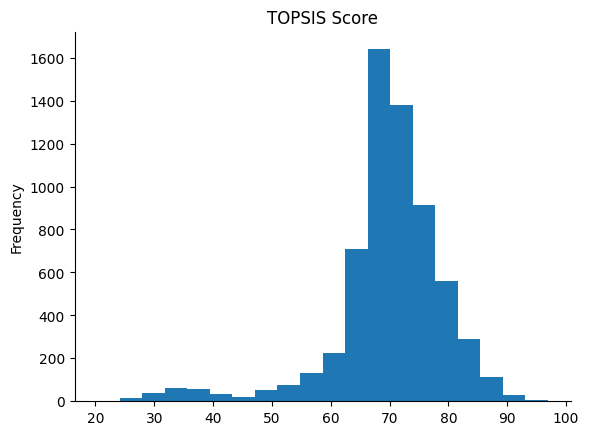

In [122]:
from matplotlib import pyplot as plt
df_final['TOPSIS Score'].plot(kind='hist', bins=20, title='TOPSIS Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [123]:
df_final[df_final['TOPSIS Score'] > 80].shape[0]/(df_final.shape[0])

0.09774554627148037

In [124]:
df_k = df_final.sort_values(by='TOPSIS Score', ascending=False)
head_10 = df_k.head(10)
head_10['hs_ceeb_cd']

3425    311235
2761    233048
1897    181690
5340    400185
6260    490527
4587    340800
4829    365335
1565    140654
13       11150
1591    141042
Name: hs_ceeb_cd, dtype: int64

In [125]:
head_10

,hs_ceeb_cd,TOPSIS Score,yield rate,APPLICATION_ASSESSMENT,distance,a_hs_college_access,a_hs_medfaminc_ptile,org_nm
3425,311235,96.934599,1.0,1.000000,0.962884,0.909091,0.949495,PLEASANTVILLE HIGH SCHOOL
2761,233048,93.774485,1.0,0.888889,0.900048,0.939394,0.929293,PONTIAC HIGH SCHOOL
1897,181690,93.352384,1.0,0.888889,0.863874,0.949495,0.989899,CLAY COUNTY HIGH SCHOOL
5340,400185,93.296463,1.0,0.888889,0.995839,0.838384,0.919192,MOUNT PLEASANT HIGH SCHOOL
6260,490527,92.821105,1.0,0.888889,0.888332,0.868687,0.929293,LINCOLN COUNTY HIGH SCHOOL
4587,340800,92.458013,1.0,0.888889,0.886961,0.848485,0.919192,CLINTON HIGH SCHOOL
4829,365335,92.431196,1.0,0.888889,0.915373,0.808081,0.979798,WARREN G HARDING HIGH SCHOOL
1565,140654,91.755933,1.0,0.888889,0.842592,0.848485,0.939394,CATALYST-MARIA HIGH SCHOOL
13,11150,91.149025,1.0,0.888889,0.825480,0.878788,0.848485,FORT PAYNE HIGH SCHOOL
1591,141042,91.019103,1.0,1.000000,0.856294,0.727273,0.898990,ERIC SOLORIO ACADEMY HIGH SCHOOL


In [126]:
df_output = df_final.sort_values(by='TOPSIS Score', ascending=False)
df_output['yield rate'] = 1 - df_output['yield rate']
df_output['APPLICATION_ASSESSMENT'] = 1 - df_output['APPLICATION_ASSESSMENT']
df_output['distance'] = 1 - df_output['distance']

In [127]:
df_output.to_excel('high_school_score.xlsx', index=False)

In [87]:
df_output['TOPSIS Score'].describe()

count    6458.000000
mean       68.951183
std         8.034984
min        20.997582
25%        66.699828
50%        69.714728
75%        72.789500
max        93.352384
Name: TOPSIS Score, dtype: float64

(array([  86.,  118.,  774., 5102.,  378.]),
 array([20.9975818 , 35.46854228, 49.93950275, 64.41046323, 78.88142371,
        93.35238419]),
 <BarContainer object of 5 artists>)

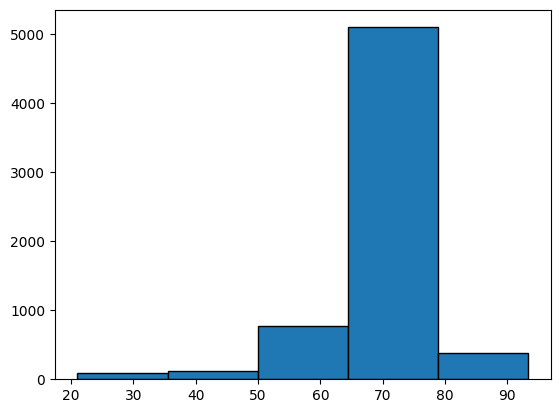

In [88]:
import matplotlib.pyplot as plt
plt.hist(df_output['TOPSIS Score'], bins=5, edgecolor='black')